***`Project 1:`***

***Saksham Jain (B21EE059)
Giridhar Uppala (B21EE072)
Atharva Ganesh Pade (B21EE014)***

In [72]:
import csv
import pandas as pd
import numpy as np

In [73]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#***Reading the csv file***#

In [74]:
file_path="/content/gdrive/MyDrive/YT_Videos_Comments.csv"

In [75]:
with open(file_path, 'r') as f:
    reader = csv.reader(f)
    # Create list of rows
    rows = [row for row in reader]

# Create Pandas DataFrame
df = pd.DataFrame(rows[1:], columns=rows[0])

# Display first 5 rows of the DataFrame
df.head()

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z


In [76]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 


import io
import unicodedata
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [140]:
!pip install nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
# Constants
# POS (Parts Of Speech) for: nouns, adjectives, verbs and adverbs
DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'} 
POS_TYPES = list(DI_POS_TYPES.keys())

# Constraints on tokens
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

In [78]:
li_quotes = df['Comment (Displayed)'].to_list()
li_quotes = li_quotes[:10000]
len(li_quotes)

10000

***Tokenize sentences and words, remove stopwords, use stemmer & lemmatizer***

First, a note on the difference between Stemming vs Lemmatization:

* Stemming: Trying to shorten a word with simple regex rules

* Lemmatization: Trying to find the root word with linguistics rules (with the use of regex rules)

In [79]:
# Get stopwords, stemmer and lemmatizer
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Remove accents function
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

# Process all quotes
li_tokens = []
li_token_lists = []
li_lem_strings = []

for i,text in enumerate(li_quotes):
    # Tokenize by sentence, then by lowercase word

    text = str(text)
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Process all tokens per quote
    li_tokens_quote = []
    li_tokens_quote_lem = []
    for token in tokens:
        # Remove accents
        t = remove_accents(token)

        # Remove punctuation
        t = str(t).translate(string.punctuation)
        li_tokens_quote.append(t)
        
        # Add token that represents "no lemmatization match"
        li_tokens_quote_lem.append("-") # this token will be removed if a lemmatization match is found below

        # Process each token
        if t not in stopwords:
            if re.search(RE_VALID, t):
                if len(t) >= MIN_STR_LEN:
                    # Note that the POS (Part Of Speech) is necessary as input to the lemmatizer 
                    # (otherwise it assumes the word is a noun)
                    pos = nltk.pos_tag([t])[0][1][:2]
                    pos2 = 'n'  # set default to noun
                    if pos in DI_POS_TYPES:
                      pos2 = DI_POS_TYPES[pos]
                    
                    stem = stemmer.stem(t)
                    lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize with the correct POS
                    
                    if pos in POS_TYPES:
                        li_tokens.append((t, stem, lem, pos))

                        # Remove the "-" token and append the lemmatization match
                        li_tokens_quote_lem = li_tokens_quote_lem[:-1] 
                        li_tokens_quote_lem.append(lem)

    # Build list of token lists from lemmatized tokens
    li_token_lists.append(li_tokens_quote)
    
    # Build list of strings from lemmatized tokens
    str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
    li_lem_strings.append(str_li_tokens_quote_lem)
    
# Build resulting dataframes from lists
df_token_lists = pd.DataFrame(li_token_lists)

print("df_token_lists.head(5):")
print(df_token_lists.head(5).to_string())

# Replace None with empty string
for c in df_token_lists:
    if str(df_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
        df_token_lists[c].fillna(value='', inplace=True)

df_lem_strings = pd.DataFrame(li_lem_strings, columns=['lem quote'])

print()
print("")
print("df_lem_strings.head():")
print(df_lem_strings.head().to_string())

df_token_lists.head(5):
      0       1       2     3      4         5     6      7       8           9           10    11    12       13    14     15    16         17    18     19      20    21             22          23    24    25     26        27      28    29    30    31      32    33    34      35    36    37    38       39    40    41       42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57      58    59    60    61     62    63       64    65     66      67     68    69    70    71    72    73     74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144   145   146   147   148

In [80]:
#Process results, find the most popular lemmatized words and group results by Part of Speech (POS)
# Add counts
print("Group by lemmatized words, add count and sort:")
df_all_words = pd.DataFrame(li_tokens, columns=['token', 'stem', 'lem', 'pos'])
df_all_words['counts'] = df_all_words.groupby(['lem'])['lem'].transform('count')
df_all_words = df_all_words.sort_values(by=['counts', 'lem'], ascending=[False, True]).reset_index()

print("Get just the first row in each lemmatized group")
df_words = df_all_words.groupby('lem').first().sort_values(by='counts', ascending=False).reset_index()
print("df_words.head(10):")
print(df_words.head(10))

Group by lemmatized words, add count and sort:
Get just the first row in each lemmatized group
df_words.head(10):
        lem  index     token    stem pos  counts
0       art  27624       art     art  NN    1595
1      make     39      made    made  VB    1509
2      quot    106      quot    quot  NN    1449
3      year    317     years    year  NN    1311
4       car  11125       car     car  NN    1241
5     human    957     human   human  NN    1157
6       get    252       get     get  VB    1118
7  electric  30457  electric  electr  JJ    1111
8       dog    330       dog     dog  NN    1094
9       use    139     using     use  VB    1052


In [81]:
#Top 10 words per Part Of Speech (POS)
df_words = df_words[['lem', 'pos', 'counts']].head(200)
for v in POS_TYPES:
    df_pos = df_words[df_words['pos'] == v]
    print()
    print("POS_TYPE:", v)
    print(df_pos.head(10).to_string())


POS_TYPE: NN
        lem pos  counts
0       art  NN    1595
2      quot  NN    1449
3      year  NN    1311
4       car  NN    1241
5     human  NN    1157
8       dog  NN    1094
10   artist  NN    1036
11   people  NN    1005
12   cancer  NN     911
15  formula  NN     782

POS_TYPE: JJ
          lem pos  counts
7    electric  JJ    1111
31        old  JJ     533
33       much  JJ     510
37        new  JJ     449
38       good  JJ     437
43  different  JJ     391
48        big  JJ     338
50      great  JJ     323
57       many  JJ     276
60       real  JJ     270

POS_TYPE: VB
      lem pos  counts
1    make  VB    1509
6     get  VB    1118
9     use  VB    1052
13    age  VB     860
14  think  VB     856
16   take  VB     780
20     go  VB     711
21   know  VB     694
26    say  VB     595
29    see  VB     563

POS_TYPE: RB
         lem pos  counts
23      also  RB     660
24      even  RB     622
25      well  RB     597
35     still  RB     461
36    really  RB     450
42

#***Pre-processing***#

In [82]:
df.isnull().sum()

User                           0
Video Title                  149
Video Description            162
Video ID                     162
Comment (Displayed)          177
Comment (Actual)             426
Comment Author               428
Comment Author Channel ID    428
Comment Time                 428
dtype: int64

In [83]:
# To drop the null values 

df.dropna(inplace=True);
df=df.reset_index(drop=True);

In [84]:
df

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...,...,...,...,...,...
379095,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
379096,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Third,Third,Izzo Mapping,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
379097,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,third,third,Indecisive,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
379098,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Second,Second,Nathan,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


In [85]:
li_quotes = df['Comment (Displayed)'].to_list()
li_quotes = li_quotes[:10000]
len(li_quotes)

10000

#***Feature Extraction***#

In [86]:
!pip install emoji
import re
import string
import emoji


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
def clean_text(text):
    # Convert input to string if necessary
    text = str(text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Convert emojis to text representations
    text = emoji.demojize(text)
    
    # Remove numbers and punctuation
    text = re.sub(r'[0-9]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()
    
    return text


In [141]:
def preprocess_text(text):
    
    text = str(text)
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('utf-8')
    
    # Remove URLs and mentions
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)

    # Tokenize text into words
    words = word_tokenize(text)
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    
    # Perform stemming
    porter = PorterStemmer()
    stemmed_words = [porter.stem(word) for word in filtered_words]
    
    # Return preprocessed text as string
    return ' '.join(stemmed_words)

In [88]:
df_shorted=df[:10000];
df_shorted;
comments=df_shorted["Comment (Displayed)"];

#To reset the indices 
comments=comments.reset_index(drop=True);

In [89]:
comments

0       zombie spider!! bomb the damn lab before it&#3...
1       This is way less cool than it seems, spiders a...
2       Spiders see this and this is why they made the...
3                                      you looks pretty 😍
4       I can hear the hairs standing up on my wife’s ...
                              ...                        
9995    99.999% chance intelligent life exists elsewhe...
9996    The great filter is a cataclysm. We&#39;ve jus...
9997             The filter says &quot;Stupid&quot; on it
9998    You pass the great filter by advanced spiritua...
9999    What gets me is why do we think that what is s...
Name: Comment (Displayed), Length: 10000, dtype: object

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_text=[clean_text(text) for text in comments]
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(cleaned_text)

In [91]:
print(tfidf_matrix)

  (0, 8967)	0.36245349264801774
  (0, 8892)	0.4137986916027529
  (0, 3930)	0.35249313191910725
  (0, 1662)	0.4244274009700923
  (0, 14926)	0.430665888615294
  (0, 17807)	0.45556006643903046
  (1, 15963)	0.09852372125869469
  (1, 7559)	0.19752454402281125
  (1, 2915)	0.2233008971133604
  (1, 9268)	0.12743307437160406
  (1, 15266)	0.12844020957340968
  (1, 9172)	0.20703782900996937
  (1, 13107)	0.1317502870227305
  (1, 9518)	0.15186833973499841
  (1, 17282)	0.1776446928255475
  (1, 6898)	0.18126147591942024
  (1, 3992)	0.3048674641963767
  (1, 135)	0.1776446928255475
  (1, 9191)	0.07257547987041157
  (1, 1178)	0.20703782900996937
  (1, 13774)	0.20180229047842124
  (1, 8723)	0.06949486779729554
  (1, 15971)	0.11068219976400578
  (1, 6900)	0.20703782900996937
  (1, 6270)	0.16499840781602917
  :	:
  (9996, 5877)	0.2512526106317328
  (9996, 6959)	0.22352360471843988
  (9996, 8723)	0.14366677127325217
  (9997, 12859)	0.726137666062931
  (9997, 13912)	0.5145984117513135
  (9997, 6059)	0.455974

In [92]:
tfidf_matrix.shape

(10000, 17828)

In [93]:
df_shorted.columns

Index(['User', 'Video Title', 'Video Description', 'Video ID',
       'Comment (Displayed)', 'Comment (Actual)', 'Comment Author',
       'Comment Author Channel ID', 'Comment Time'],
      dtype='object')

#***Visulaization***#

<Axes: xlabel='length', ylabel='Density'>

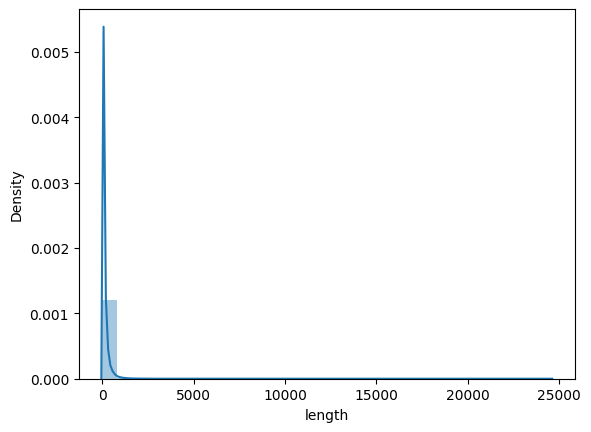

In [94]:
# Plot of length of the displayed comment
import seaborn as sns
df['length'] = df['Comment (Displayed)'].apply(lambda x: len(x))
sns.distplot(df["length"],kde=True,bins=30)

In [95]:
# The longest comment 
print("The longest comment is:\n",df.loc[df['length'].idxmax(), 'Comment (Displayed)']);
print("The length of the longest message:",df['length'].max())

The longest comment is:
 ♥️LoveUAllAngelBeautifulSpeaksUpAlwaysAdmiresUrBeautyUtubeSHEPHERDSCHAPELStudyUrsUpFrontAliveGoodBibleReadGospelGodSpellsAsUSpeakAngelStandsInTheMistOfUsEspoAllDIMENSIONS<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=24m36s">24:36</a>+LUKE24:31+VanishedDidItBurnAsUOpenScripturesWORD2Wise1ECC9ObeyMyVOICE<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=7m23s">7:23</a>JER3:8GodADivorceeWordBecameFLESH<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=1m14s">1:14</a>JOHN20:22HolySpiritINHERITANCE<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=44m28s">44:28</a>EZE18HRU105mgZincMutationSurvivalAnimalsHEAVEN11ISA<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=8m20s">8:20</a>UrMinds2PowerFullLifesLovesMemoriesMiraclesLearnsArtsSciencesMusiciansVoicesSingsFeelsItsREVERENCES1:7PROV<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=31m12s">31:12</a>DoesGoodNotEvilTRUTH<a href="https://www.youtube.com/watch?v=rhMS

In [96]:
#To detect url
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+';

# Using str.contains() to create a boolean mask indicating which comments contain URLs
has_url = df['Comment (Displayed)'].str.contains(url_pattern)

# Filter the data frame to keep only comments that contain URLs
comments_with_url = df[has_url]

# Print the comments with URLs
print(comments_with_url['Comment (Displayed)'])

211       These should be interesting….<br><a href="http...
292       I just learnt &#39;paternalistic&#39; at <a hr...
340       <a href="https://www.youtube.com/watch?v=USmu0...
387       <a href="https://www.youtube.com/watch?v=USmu0...
539       <a href="https://www.youtube.com/watch?v=USmu0...
                                ...                        
378983    no such things as black holes, neutron stars, ...
379000    where did you get the picture for <a href="htt...
379035    <a href="http://www.youtube.com/watch?v=xyXpQx...
379055    <a href="http://www.youtube.com/watch?v=xyXpQx...
379071    <a href="http://www.youtube.com/watch?v=xyXpQx...
Name: Comment (Displayed), Length: 17123, dtype: object


***Number of comments per author***

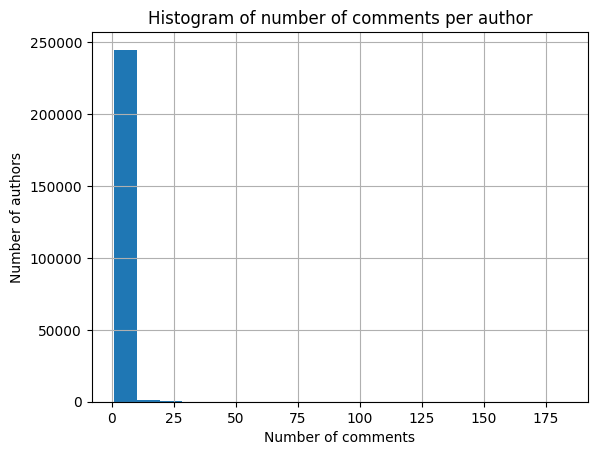

Cluster 0:
['Ciri' 'Daniel Harper' 'Szilárd Oberritter' ... 'Kevin Dahl-Skog' 'Maeve'
 'Jesus Christ']
Cluster 1:
['Bagus Hutomo' 'CMZ neu' 'Kiana Marrie ' ... 'Trion' 'The Slingshot King'
 '314Show']
Cluster 2:
['Christopher Vinovich' 'Askia mumine' 'dArk lord' ... 'Arjun Sinha'
 'shaheed goni' 'Sha Kur']


In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

comments2=df["Comment (Displayed)"];
cleaned_text2=[clean_text(text) for text in comments2]
vectorizer2 = TfidfVectorizer(stop_words='english')
tfidf_matrix2 = vectorizer2.fit_transform(cleaned_text2)

df2 = df;
km = KMeans(n_clusters=3);
km.fit(tfidf_matrix2);

# Assign the cluster labels to the comments

df2['cluster'] = km.labels_

# Plot a histogram of the number of comments per author

df2['Comment Author'].value_counts().hist(bins=20)
plt.title('Histogram of number of comments per author')
plt.xlabel('Number of comments')
plt.ylabel('Number of authors')
plt.show()

# Print the authors in each cluster
for i in range(3):
    print(f'Cluster {i}:')
    print(df2[df2['cluster'] == i]['Comment Author'].unique())

li_token_lists_flat[:10]: ['zombie', 'spider', '', '', 'bomb', 'the', 'damn', 'lab', 'before', 'it']
[('the', 11615), ('to', 7199), ('and', 6599), ('a', 6483), ('it', 5927), ('is', 5795), ('of', 5122), ('that', 4261), ('i', 4198), ('br', 3447), ('in', 3331), ('s', 3312), ('you', 3113), ('t', 2774), ('for', 2709), ('they', 2543), ('are', 2511), ('not', 2302), ('this', 2159), ('be', 2152), ('we', 2081), ('but', 1819), ('have', 1718), ('just', 1705), ('can', 1699), ('on', 1680), ('as', 1662), ('so', 1570), ('with', 1566), ('art', 1566), ('ai', 1517), ('like', 1501), ('if', 1453), ('quot', 1449), ('will', 1340), ('or', 1313), ('there', 1210), ('an', 1135), ('f', 1135), ('about', 1128), ('electric', 1108), ('at', 1106), ('from', 1100), ('more', 1089), ('all', 1061), ('what', 1037), ('by', 991), ('people', 982), ('do', 981), ('no', 977), ('how', 973), ('your', 953), ('my', 952), ('their', 929), ('don', 898), ('years', 887), ('cars', 876), ('cancer', 847), ('would', 830), ('when', 813), ('was

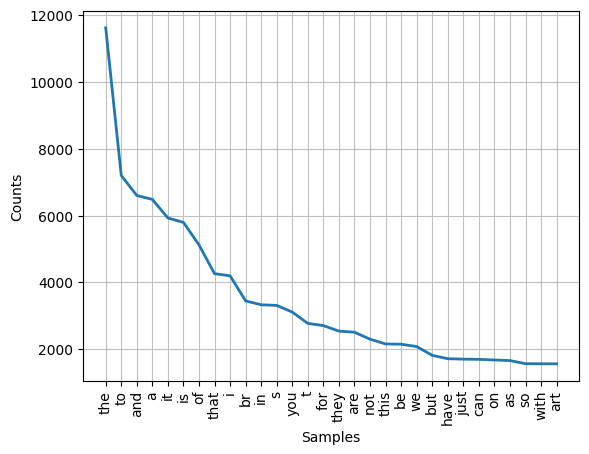

<Axes: xlabel='Samples', ylabel='Counts'>

In [98]:
#Frequency plot of all the words

li_token_lists_flat = [y for x in li_token_lists for y in x]  # flatten the list of token lists to a single list
print("li_token_lists_flat[:10]:", li_token_lists_flat[:10])

di_freq = nltk.FreqDist(li_token_lists_flat)
del di_freq['']
li_freq_sorted = sorted(di_freq.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted)
    
di_freq.plot(30, cumulative=False)

[('art', 1595), ('make', 1509), ('quot', 1449), ('year', 1311), ('car', 1241), ('human', 1157), ('get', 1118), ('electric', 1111), ('dog', 1094), ('use', 1052), ('artist', 1036), ('people', 1005), ('cancer', 911), ('age', 860), ('think', 856), ('formula', 782), ('take', 780), ('time', 731), ('work', 726), ('thing', 720), ('go', 711), ('know', 694), ('video', 666), ('also', 660), ('even', 622), ('well', 597), ('say', 595), ('look', 590), ('life', 571), ('see', 563), ('way', 561), ('old', 533), ('need', 517), ('much', 510), ('fuel', 489), ('still', 461), ('really', 450), ('new', 449), ('good', 437), ('race', 429), ('want', 420), ('something', 419), ('already', 414), ('different', 391), ('cell', 369), ('come', 367), ('never', 366), ('create', 347), ('big', 338), ('watch', 327), ('great', 323), ('actually', 315), ('problem', 309), ('give', 306), ('style', 286), ('love', 285), ('first', 278), ('many', 276), ('world', 276), ('someone', 273), ('real', 270), ('lot', 259), ('stop', 259), ('poin

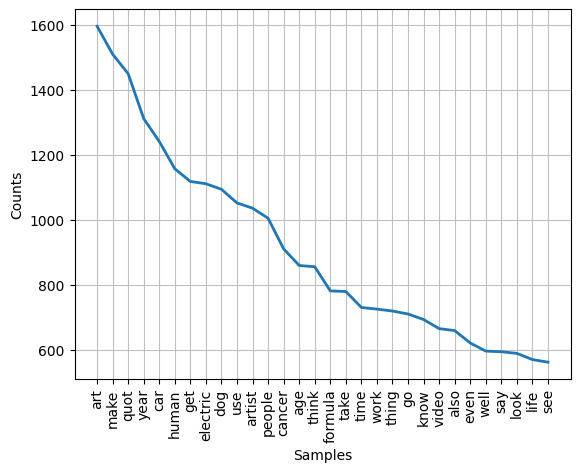

<Axes: xlabel='Samples', ylabel='Counts'>

In [99]:
#Sorted frequency plot for Lemmatized  words after removing stopwords

li_lem_words = df_all_words['lem'].tolist()
di_freq2 = nltk.FreqDist(li_lem_words)
li_freq_sorted2 = sorted(di_freq2.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted2)
    
di_freq2.plot(30, cumulative=False)

<Axes: >

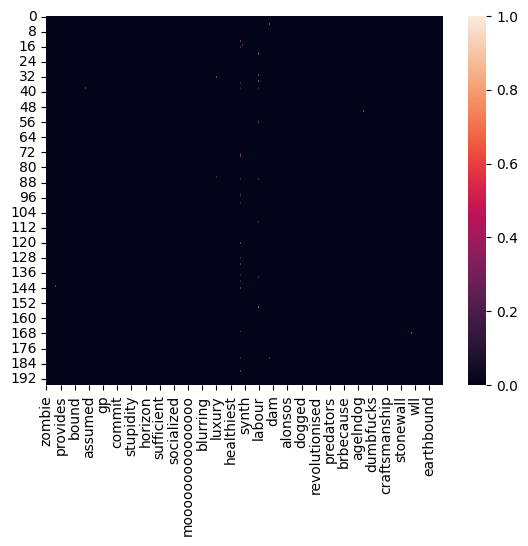

In [104]:
import seaborn as sns
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.vocabulary_)


sns.heatmap(tfidf_df)

#***Kmeans***#





In [101]:
import warnings

In [102]:
warnings.filterwarnings("ignore")

In [103]:
videoIDs=np.unique(df['Video ID'])
video=np.random.choice(videoIDs)
indexes=np.where(df["Video ID"]==video)[0]

comments=df.iloc[indexes]['Comment (Actual)']
comments=comments.reset_index(drop=True)

df_video=df.iloc[indexes]
df_video=df_video.reset_index(drop=True)

cleaned_text2=[clean_text(text) for text in comments]
vectorizer3= TfidfVectorizer(stop_words='english',vocabulary=vectorizer.vocabulary_)
tfidf_matrix = vectorizer3.fit_transform(cleaned_text2)

In [137]:
video

'lBRWTiE5CDQ'

[10.298832436148501, 4.044567988146525, 2.4329742399953886, 3.2599930621436783, 1.0382208365286374, 2.9822198994616826, 2.015208638317972, 2.664195972977268, 0.45111112699493106]
Elbow point (optimal number of clusters): 2


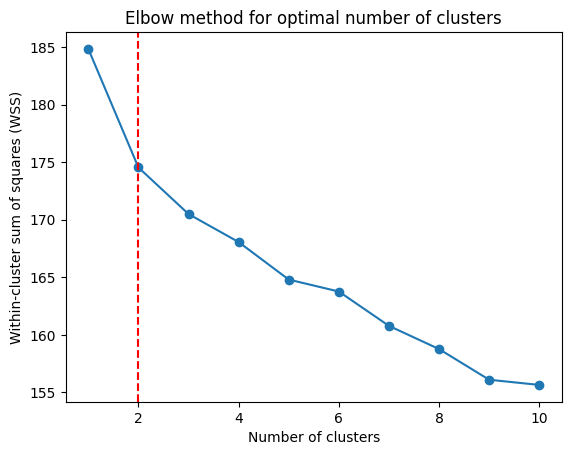

In [105]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# define a range of number of clusters to try
k_values = range(1, 11)

# compute the within-cluster sum of squares (WSS) for each value of k
wss_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    wss_values.append(kmeans.inertia_)

# plot the WSS values against the number of clusters
plt.plot(k_values, wss_values, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.title('Elbow method for optimal number of clusters')

# find the elbow point as the optimal number of clusters
diffs = [abs(wss_values[i] - wss_values[i-1]) for i in range(1, len(wss_values))]
print(diffs)
elbow_point = diffs.index(max(diffs)) + 2
print('Elbow point (optimal number of clusters):', elbow_point)

# add a vertical line to mark the elbow point
plt.axvline(x=elbow_point, color='r', linestyle='--')

plt.show()


In [106]:
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
kmeans.fit(tfidf_matrix)

# Get the cluster assignments for each comment
cluster_labels = kmeans.labels_


In [107]:
for i in np.unique(cluster_labels):
  print(i)
  ind=np.where(cluster_labels == i)[0]
  for j in ind:
    print(comments[j])
  print('\n\n NEW CLUSTER \n\n')

0
the waffle gouse has found it's new host
The waffle house has found its new host
The waffle house has found its new host
The waffle house has found it's new host
The Waffle House Has Found Its New Host.
The waffle house has found its new host
The waffle house has found it's new host!!!
The Waffle House has found its new host
The waffle house has found its new host
The waffle house has found its new host
The waffle house had found its new host


 NEW CLUSTER 


1
but how do you light fire in igloo but the igloo doesn't melt
Elementary school has failed this woman.🫣
Go out with me 🥺
I always learn something new every time I watch your video, awesome 👍
My mind has been tainted after learning what iglooing is 💀
Idk about that but I stayed in a igloo once and hell it was cold
When I was a kid, my dad built one in our backyard and we all spent the night in it. Last year, I built one with him for my sister so she could have the same experience.
The same goes for almost all enclosed spaces. 

#***PCA***#

In [113]:
from sklearn.decomposition import PCA

# create a PCA object
pca = PCA(n_components=2, random_state=42)

# apply PCA on the TF-IDF matrix
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# print the shape of the new matrix
print(tfidf_pca.shape)

(196, 2)


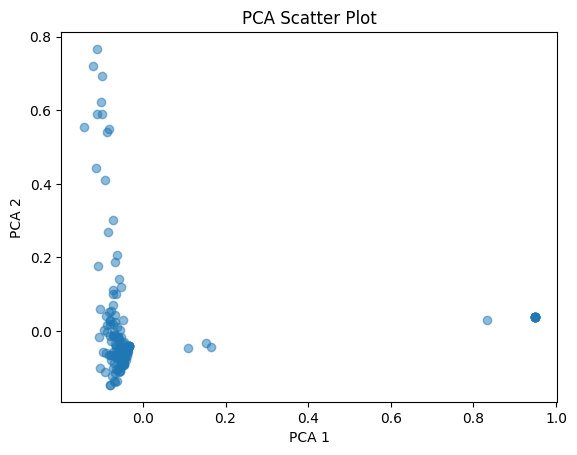

In [114]:
import matplotlib.pyplot as plt

# create a scatter plot of the PCA data
plt.scatter(tfidf_pca[:,0], tfidf_pca[:,1], alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#***DBScan***#

In [118]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise cosine similarity between comments
similarity_matrix = cosine_similarity(tfidf_matrix)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
cluster_labels = dbscan.fit_predict(similarity_matrix)

# Print number of clusters and number of comments in each cluster
num_clusters = len(set(cluster_labels))
print("Number of clusters:", num_clusters)
for i in range(-1,num_clusters-1):
    cluster_size = sum(cluster_labels == i)
    print("Cluster", i, "contains", cluster_size, "comments:")
    for comment in comments[cluster_labels == i]:
        print("-", comment)

Number of clusters: 4
Cluster -1 contains 125 comments:
- Elementary school has failed this woman.🫣
- Go out with me 🥺
- I always learn something new every time I watch your video, awesome 👍
- My mind has been tainted after learning what iglooing is 💀
- Idk about that but I stayed in a igloo once and hell it was cold
- When I was a kid, my dad built one in our backyard and we all spent the night in it. Last year, I built one with him for my sister so she could have the same experience.
- The same goes for almost all enclosed spaces. In the freezing cold, even an unisolated shed will be warmer with you in it. Though an igloo does have better isolating capability and you’re better off in that or digging a snow cave than betting on a shed
- Igloos are probably still half a million here in Toronto
- its*
- *its
- And also the size is determined by a couple making love. I learned this when I was around 12. I have no idea why I still remember
- just like aerogel
its the least dense solid and

#***Domain Specific Feature***#

In [121]:
video_title = df_video["Video Title"].iloc[0]
video_description = df_video["Video Description"].iloc[0]

In [122]:
def extract_keywords(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Split the text into words
    words = text.split()
    # Remove common stop words
    stopwords = ["the", "and", "of", "a", "an", "in", "on", "to", "is", "with", "for", "that"]
    words = [word for word in words if word not in stopwords]
    # Return the keywords as an array
    return words

# Extract keywords from the video title and description
video_title_keywords = extract_keywords(df_video["Video Title"].iloc[0])
video_description_keywords = extract_keywords(df_video["Video Description"].iloc[0])

In [123]:
print("Video Title Keywords:", video_title_keywords)
print("Video Description Keywords:", video_description_keywords)

Video Title Keywords: ['how', 'do', 'igloos', 'work']
Video Description Keywords: ['how', 'does', 'igloo', 'keep', 'you', 'warm', 'youre', 'surrounded', 'by', 'ice', 'but', 'youre', 'warmer', 'not', 'just', 'from', 'like', 'wind', 'protection', 'here', 'are', 'physics', 'make', 'this', 'possible', 'if', 'youre', 'interested', 'more', 'physics', 'videos', 'i', 'made', 'this', 'one', 'how', 'james', 'webb', 'space', 'telescope', 'searches', 'exoplanets', 'water', 'httpsyoutubeampb1lacwf4', 'if', 'youd', 'like', 'support', 'me', 'please', 'subscribe', 'httpswwwyoutubecomcleoabramsub_confirmation1']


In [124]:
def extract_features(row):
    # Extract the comment text
    comment_text = row["Comment (Displayed)"]
    
    # Check if the comment contains links to other products or services
    if "http" in comment_text:
        return "Spam"
    
    # Check if the comment contains the video title or description keywords
    comment_keywords = extract_keywords(comment_text)
    for keyword in comment_keywords:
        if keyword in video_title_keywords or keyword in video_description_keywords:
            return "Not Spam"
    
    # If none of the above conditions are satisfied, the comment is considered spam
    return "Spam"

In [125]:
# Apply the feature extraction function to each row of the data
df_video["Label"] = df_video.apply(extract_features, axis=1)

# Print the counts of each label
print(df_video["Label"].value_counts())

Not Spam    141
Spam         55
Name: Label, dtype: int64


In [126]:
spam_comments = df_video[df_video['Label'] == 'Spam']['Comment (Displayed)']
print('SPAM COMMENTS:')
for i in spam_comments:
  print(i)
print('\n')

non_spam_comments = df_video[df_video['Label'] == 'Not Spam']['Comment (Displayed)']
print('NON-SPAM COMMENTS:')
for i in non_spam_comments:
  print(i)

SPAM COMMENTS:
My mind has been tainted after learning what iglooing is 💀
its*
*its
Why doesn’t it melt inside
Basically aerogel huh, nice
Great job of rushing informations in a digestible manner.
She&#39;s asking the questions 4th graders know
i&#39;ve enterd the igglo. now what?
Isolation
When you’ve never seen snow:
&quot;air is a great thermal insulator&quot; xDDD???
dats nice
ok
90-95% air<br>isn&#39;t it the same with aerogel?
PMK covered it first.
Thanks. Always 🤔
the waffle gouse has found it&#39;s new host
Ooooo its pack of snow
its*
The waffle house has found its new host
The waffle house has found its new host
The waffle house has found it&#39;s new host
The Waffle House Has Found Its New Host.
Wow ur sooo beautiful😍✨
The waffle house has found its new host
The waffle house has found it&#39;s new host!!!
The Waffle House has found its new host
The waffle house has found its new host
The waffle house has found its new host
snow mostly air :) got it :) <br>I am now ready for s

#***NLTK***#

In [127]:
# Setup and importing libraries
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [128]:

import re
from nltk.corpus import stopwords

def extract_keywords(text):
    stop_words = set(stopwords.words('english'))
    words = re.findall(r'\w+', text.lower())
    keywords = [word for word in words if word not in stop_words]
    return keywords

def extract_features(row, title_keywords, desc_keywords):
    comment = row['Comment (Displayed)']
    comment_keywords = extract_keywords(comment)
    if any(keyword in comment for keyword in title_keywords) or any(keyword in comment for keyword in desc_keywords):
        comment_keywords.append('relevant')
    else:
        comment_keywords.append('irrelevant')
    return comment_keywords

# Load the data
data = df_video

# Extract keywords from the video title and description
title = data['Video Title'].iloc[0]
desc = data['Video Description'].iloc[0]
title_keywords = extract_keywords(title)
desc_keywords = extract_keywords(desc)

# Extract features from the comments
data['features'] = data.apply(lambda row: extract_features(row, title_keywords, desc_keywords), axis=1)

# Cluster the comments
spam_words = set(['subscribe', 'subscribed', 'like', 'comment', 'notification', 'visit', 'follow', 'channel'])
data['label'] = data['features'].apply(lambda x: 'spam' if set(x).intersection(spam_words) else 'not spam')

# Print out the spam and non-spam comments
spam_comments = data[data['label'] == 'spam']['Comment (Displayed)']
print('SPAM COMMENTS:')
print(spam_comments)
print('\n')

non_spam_comments = data[data['label'] == 'not spam']['Comment (Displayed)']
print('NON-SPAM COMMENTS:')
print(non_spam_comments)


SPAM COMMENTS:
16     just like aerogel<br>its the least dense solid...
38     This girl read a bbc article and just believed...
52     Singaporean physics papers with thermal questi...
56     you make the heat, it keeps the heat in, like ...
78     She looks like that one actress form Thor the ...
85     What really fucks me up is how did someon figu...
86     For camping you can make snow caves which are ...
95     It&#39;s not made from blocks of ice?! I feel ...
100    There&#39;s no way anyone thought they were ma...
107                 My god you look like Natalie Portman
108    Also the exterior temperature matters a lot. I...
109    Tldr; from a eskimo; the snow of the igloo is ...
123    Also your heat bounces off the walls like in a...
128    My brother and I made an “igloo” once. It wasn...
139    Snow is 30 40% water, get your percentage righ...
146    Hilarious how each picture shown isn&#39;t eve...
161                             Its like natural aerogel
178    i watch m

#***NLTK and Kmeans***#

In [129]:

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def extract_keywords(text):
    stop_words = set(stopwords.words('english'))
    words = re.findall(r'\w+', text.lower())
    keywords = [word for word in words if word not in stop_words]
    return keywords

def extract_features(row, title_keywords, desc_keywords):
    comment = row['Comment (Actual)']
    comment_keywords = extract_keywords(comment)
    if any(keyword in comment for keyword in title_keywords) or any(keyword in comment for keyword in desc_keywords):
        comment_keywords.append('relevant')
    else:
        comment_keywords.append('irrelevant')
    return ' '.join(comment_keywords)

# Load the data
data = df_video

# Extract keywords from the video title and description
title = data['Video Title'].iloc[0]
desc = data['Video Description'].iloc[0]
title_keywords = extract_keywords(title)
desc_keywords = extract_keywords(desc)

# Extract features from the comments
data['features'] = data.apply(lambda row: extract_features(row, title_keywords, desc_keywords), axis=1)

# Compute TF-IDF vectors for the comments
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['features'])

# Cluster the comments
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(tfidf)

# Add the labels to the data
data['Label'] = labels
data['Label'] = data['Label'].map({0: 'Not Spam', 1: 'Spam'})
data = data.rename(columns={'Video Title': 'Video Title', 'Video Description': 'Video Description', 'Comment (Displayed)': 'Comment'})

# Print out the spam and non-spam comments
spam_comments = data[data['Label'] == 'Spam']['Comment (Actual)']
spam_comments = df_video[df_video['Label'] == 'Spam']['Comment (Actual)']
print('SPAM COMMENTS:',len(spam_comments))
for i in spam_comments:
  print(i)
print('\n')

non_spam_comments = df_video[df_video['Label'] == 'Not Spam']['Comment (Actual)']
print('NON-SPAM COMMENTS:',len(non_spam_comments))
for i in non_spam_comments:
  print(i)


SPAM COMMENTS: 104
but how do you light fire in igloo but the igloo doesn't melt
My mind has been tainted after learning what iglooing is 💀
Idk about that but I stayed in a igloo once and hell it was cold
When I was a kid, my dad built one in our backyard and we all spent the night in it. Last year, I built one with him for my sister so she could have the same experience.
The same goes for almost all enclosed spaces. In the freezing cold, even an unisolated shed will be warmer with you in it. Though an igloo does have better isolating capability and you’re better off in that or digging a snow cave than betting on a shed
also a cool part is the entrance they basically dig a hole and build of the entrance so the cold air cant get in and the warm air cant get out since warm air rises and cold air sinks to the bottom
Why doesnt the warm air melt the snow?
And also the size is determined by a couple making love. I learned this when I was around 12. I have no idea why I still remember
just l

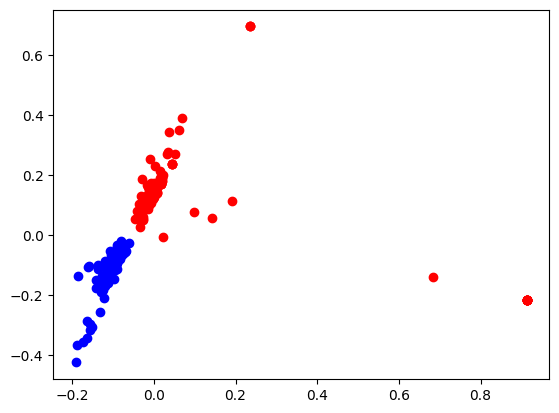

In [130]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of the TF-IDF vectors using PCA
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf.toarray())

# Plot the comments in a scatter plot
colors = ['red', 'blue']
for i in range(len(data)):
    plt.scatter(tfidf_pca[i, 0], tfidf_pca[i, 1], color=colors[labels[i]])
plt.show()

In [131]:

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def extract_keywords(text):
    stop_words = set(stopwords.words('english'))
    words = re.findall(r'\w+', text.lower())
    keywords = [word for word in words if word not in stop_words]
    return keywords

def extract_features(row, title_keywords, desc_keywords):
    comment = row['Comment (Actual)']
    comment_keywords = extract_keywords(comment)
    if any(keyword in comment for keyword in title_keywords) or any(keyword in comment for keyword in desc_keywords):
        comment_keywords.append('relevant')
    else:
        comment_keywords.append('irrelevant')
    return ' '.join(comment_keywords)

# Load the data
data = df_video

# Extract keywords from the video title and description
title = data['Video Title'].iloc[0]
desc = data['Video Description'].iloc[0]
title_keywords = extract_keywords(title)
desc_keywords = extract_keywords(desc)

# Extract features from the comments
data['features'] = data.apply(lambda row: extract_features(row, title_keywords, desc_keywords), axis=1)

# Compute TF-IDF vectors for the comments
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['features'])

# Cluster the comments
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(tfidf_pca)

# Add the labels to the data
data['Label'] = labels
data['Label'] = data['Label'].map({0: 'Not Spam', 1: 'Spam'})
data = data.rename(columns={'Video Title': 'Video Title', 'Video Description': 'Video Description', 'Comment (Displayed)': 'Comment'})

# Print out the spam and non-spam comments
spam_comments = data[data['Label'] == 'Spam']['Comment (Actual)']
spam_comments = df_video[df_video['Label'] == 'Spam']['Comment (Actual)']
print('SPAM COMMENTS:',len(spam_comments))
for i in spam_comments:
  print(i)
print('\n')

non_spam_comments = df_video[df_video['Label'] == 'Not Spam']['Comment (Actual)']
print('NON-SPAM COMMENTS:',len(non_spam_comments))
for i in non_spam_comments:
  print(i)


SPAM COMMENTS: 11
the waffle gouse has found it's new host
The waffle house has found its new host
The waffle house has found its new host
The waffle house has found it's new host
The Waffle House Has Found Its New Host.
The waffle house has found its new host
The waffle house has found it's new host!!!
The Waffle House has found its new host
The waffle house has found its new host
The waffle house has found its new host
The waffle house had found its new host


NON-SPAM COMMENTS: 185
but how do you light fire in igloo but the igloo doesn't melt
Elementary school has failed this woman.🫣
Go out with me 🥺
I always learn something new every time I watch your video, awesome 👍
My mind has been tainted after learning what iglooing is 💀
Idk about that but I stayed in a igloo once and hell it was cold
When I was a kid, my dad built one in our backyard and we all spent the night in it. Last year, I built one with him for my sister so she could have the same experience.
The same goes for almost 

#***Agglomerative and spectral***#

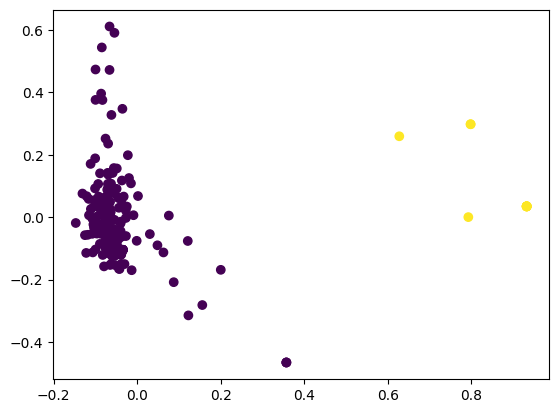

In [132]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


# Compute TF-IDF vectors for the comments
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df_video['Comment (Displayed)'])

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf.toarray())

# Cluster the comments with Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(tfidf_pca)

# Visualize the clusters
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=agg_labels, cmap='viridis')
plt.show()

# Add the labels to the data
df_video['Agglomerative_Label'] = agg_labels

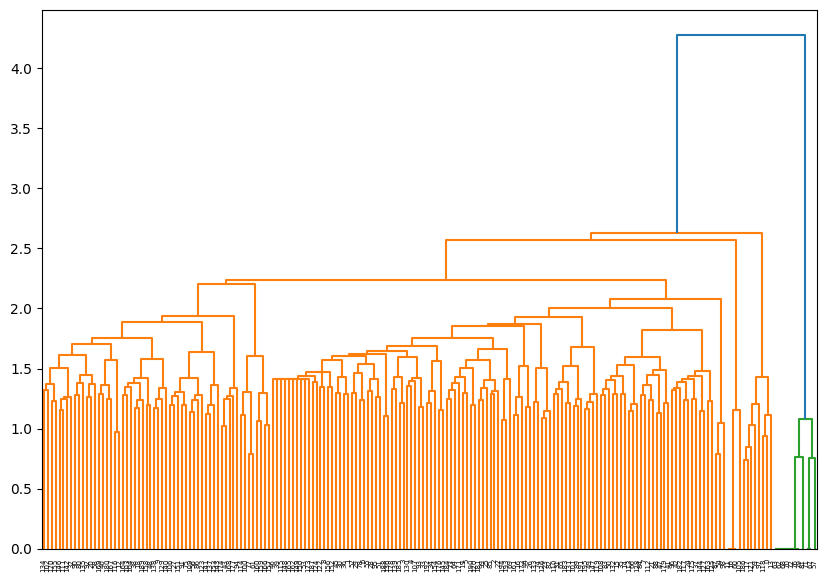

In [133]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Compute TF-IDF vectors for the comments
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df_video['Comment (Displayed)'])

# Perform hierarchical clustering
linked = linkage(tfidf.toarray(), 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

# Cluster the comments with Agglomerative Clustering
hier_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier_labels = hier_clustering.fit_predict(tfidf.toarray())

# Add the labels to the data
df_video['Hierarchical_Label'] = hier_labels


In [134]:
# Print out the spam and non-spam comments
spam_comments = df_video[df_video['Hierarchical_Label'] == 0]['Comment (Displayed)']
print('SPAM COMMENTS:')
for i in spam_comments:
  print(i)
print('\n')

non_spam_comments = df_video[df_video['Hierarchical_Label'] == 1]['Comment (Displayed)']
print('NON-SPAM COMMENTS:')
for i in spam_comments:
  print(i)

SPAM COMMENTS:
but how do you light fire in igloo but the igloo doesn&#39;t melt
Elementary school has failed this woman.🫣
Go out with me 🥺
I always learn something new every time I watch your video, awesome 👍
My mind has been tainted after learning what iglooing is 💀
Idk about that but I stayed in a igloo once and hell it was cold
When I was a kid, my dad built one in our backyard and we all spent the night in it. Last year, I built one with him for my sister so she could have the same experience.
The same goes for almost all enclosed spaces. In the freezing cold, even an unisolated shed will be warmer with you in it. Though an igloo does have better isolating capability and you’re better off in that or digging a snow cave than betting on a shed
Igloos are probably still half a million here in Toronto
also a cool part is the entrance they basically dig a hole and build of the entrance so the cold air cant get in and the warm air cant get out since warm air rises and cold air sinks to 

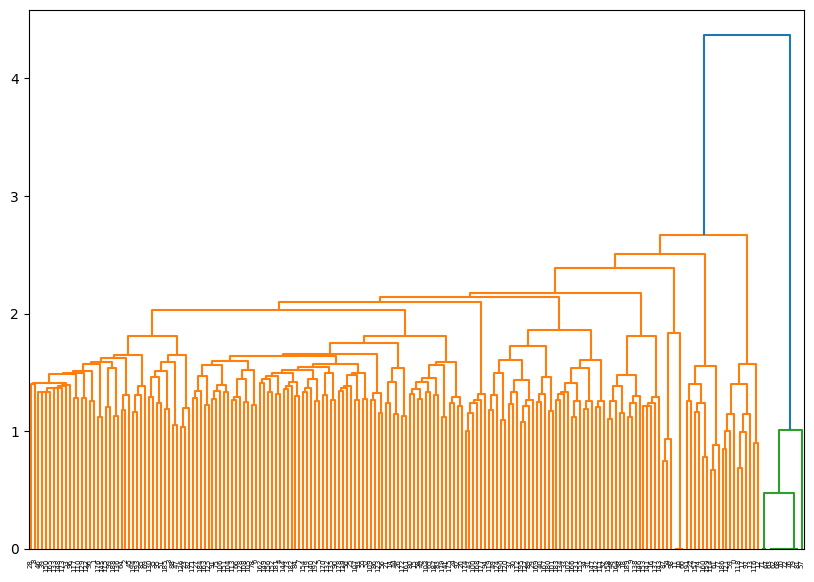

In [135]:

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Load the data


# Define a function to extract keywords from text
def extract_keywords(text):
    stop_words = set(stopwords.words('english'))
    words = re.findall(r'\w+', text.lower())
    keywords = [word for word in words if word not in stop_words]
    return keywords

# Define a function to extract features from a comment
def extract_features(row, title_keywords, desc_keywords):
    comment = row['Comment (Displayed)']
    video_id = row['Video ID']
    comment_keywords = extract_keywords(comment)
    
    # Check if the comment contains a reference to the same video
    if video_id in comment:
        comment_keywords.append('same_video')
    else:
        comment_keywords.append('different_video')
        
    # Check if the comment contains meaningful content
    if any(keyword in comment for keyword in title_keywords) or any(keyword in comment for keyword in desc_keywords):
        comment_keywords.append('relevant')
    else:
        comment_keywords.append('irrelevant')
        
    return ' '.join(comment_keywords)

# Extract keywords from the video title and description
title = df_video['Video Title'].iloc[0]
desc = df_video['Video Description'].iloc[0]
title_keywords = extract_keywords(title)
desc_keywords = extract_keywords(desc)

# Extract features from the comments
df_video['features'] = df_video.apply(lambda row: extract_features(row, title_keywords, desc_keywords), axis=1)

# Compute TF-IDF vectors for the comments
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df_video['features'])

# Perform KMeans clustering on the comments
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(tfidf)

# Perform hierarchical clustering on the comments
linked = linkage(tfidf.toarray(), 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()
hier_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier_labels = hier_clustering.fit_predict(tfidf.toarray())

# Combine the labels from the two clustering algorithms
combined_labels = []
for i in range(len(kmeans_labels)):
    if kmeans_labels[i] == hier_labels[i]:
        combined_labels.append(kmeans_labels[i])
    else:
        combined_labels.append(2)

# Add the labels to the data
df_video['KMeans_Label'] = kmeans_labels
df_video['Hierarchical_Label'] = hier_labels
df_video['Combined_Label'] = combined_labels
df_video['KMeans_Label'] = df_video['KMeans_Label'].map({0: 'Not Spam', 1: 'Spam', 2: 'Undecided'})
df_video['Hierarchical_Label'] = df_video['Hierarchical_Label'].map({0: 'Not Spam', 1: 'Spam', 2: 'Undecided'})
df_video['Combined_Label'] = df_video['Combined_Label'].map({0: 'Not Spam', 1: 'Spam', 2: 'Undecided'})



In [136]:
# Count the number of spam comments by KMeans
kmeans_spam_count = len(df_video[df_video['KMeans_Label'] == 'Spam'])

# Count the number of spam comments by Hierarchical clustering
hier_spam_count = len(df_video[df_video['Hierarchical_Label'] == 'Spam'])

print('Number of spam comments by KMeans: ', kmeans_spam_count)
print('Number of spam comments by Hierarchical clustering: ', hier_spam_count)


Number of spam comments by KMeans:  92
Number of spam comments by Hierarchical clustering:  11


In [143]:

cleaned_text_li  =[preprocess_text(text) for text in li_quotes]
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(cleaned_text_li)

In [144]:
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_clustering.fit(tfidf_matrix.toarray())
y_pred = agg_clustering.labels_


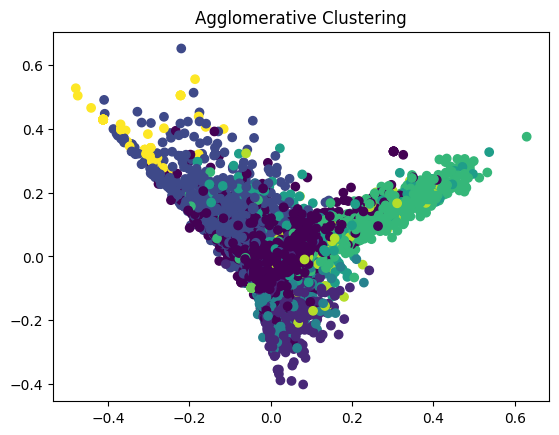

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

import matplotlib.pyplot as plt
# Plot the clusters
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=y_pred)
plt.title('Agglomerative Clustering')
plt.show()

In [146]:
unique_videos = df['Video ID'].unique()
random_videos = np.random.choice(unique_videos, size=10, replace=False)
random_videos

array(['VMJPHqwv41U', 'gOT8J_fqyos', 'z8evo1jr5Nk', 'Q089i8RQPB0',
       'm78_sOEadC8', 'x4GqoH4belA', '04v4qWVtdPs', 'V2XvgUcbUFE',
       '59R1WN4tHrM', '9k7zywli4Vg'], dtype=object)

In [147]:
subset1 = df[df['Video ID'] == random_videos[0]]
subset2 = df[df['Video ID'] == random_videos[1]]
subset3 = df[df['Video ID'] == random_videos[2]]
subset4 = df[df['Video ID'] == random_videos[3]]
subset5 = df[df['Video ID'] == random_videos[4]]
subset6 = df[df['Video ID'] == random_videos[5]]
subset7 = df[df['Video ID'] == random_videos[6]]
subset8 = df[df['Video ID'] == random_videos[7]]
subset9 = df[df['Video ID'] == random_videos[8]]
subset10= df[df['Video ID'] == random_videos[9]]

In [148]:
all_subsets = [subset1, subset2, subset3, subset4, subset5,subset6,subset7,subset8,subset9,subset10]

In [149]:
def getting_preprocessed(subset):
  li_quotes = subset['Comment (Displayed)'].to_list()
  cleaned_text =[preprocess_text(text) for text in li_quotes]
  return cleaned_text

In [150]:
clean1 = getting_preprocessed(subset1)
clean2 = getting_preprocessed(subset2)
clean3 = getting_preprocessed(subset3)
clean4 = getting_preprocessed(subset4)
clean5 = getting_preprocessed(subset5)
clean6 = getting_preprocessed(subset6)
clean7 = getting_preprocessed(subset7)
clean8 = getting_preprocessed(subset8)
clean9 = getting_preprocessed(subset9)
clean10= getting_preprocessed(subset10)

In [151]:
all_clean = [ clean1,clean2,clean3,clean4,clean5,clean6,clean7,clean8,clean9,clean10]


In [152]:
from sklearn.metrics import silhouette_score

def agglomerative(clean):
  vectorizer = TfidfVectorizer(stop_words='english')
  tfidf_matrix = vectorizer.fit_transform(clean)
  pca = PCA(n_components=2)
  tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())
  silhouette_scores = []
  for n_clusters in range(2,8):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg.fit_predict(tfidf_pca)
    silhouette_scores.append(silhouette_score(tfidf_matrix, cluster_labels))
  optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
  agg_clustering = AgglomerativeClustering(n_clusters=optimal_num_clusters)
  agg_clustering.fit(tfidf_pca)
  y_pred = agg_clustering.labels_
  plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=y_pred)
  plt.title('Agglomerative Clustering')
  plt.show()

In [153]:
from sklearn.cluster import SpectralClustering
def spectral(clean):
  vectorizer = TfidfVectorizer(stop_words='english')
  tfidf_matrix = vectorizer.fit_transform(clean)
  pca = PCA(n_components=2)
  tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())
  silhouette_scores = []
  for n_clusters in range(2,8):
    agg = SpectralClustering(n_clusters=n_clusters)
    cluster_labels = agg.fit_predict(tfidf_pca)
    silhouette_scores.append(silhouette_score(tfidf_matrix, cluster_labels))
  optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
  agg_clustering = SpectralClustering(n_clusters=optimal_num_clusters)
  agg_clustering.fit(tfidf_pca)
  y_pred = agg_clustering.labels_
  plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=y_pred)
  plt.title('Spectral Clustering')
  plt.show()

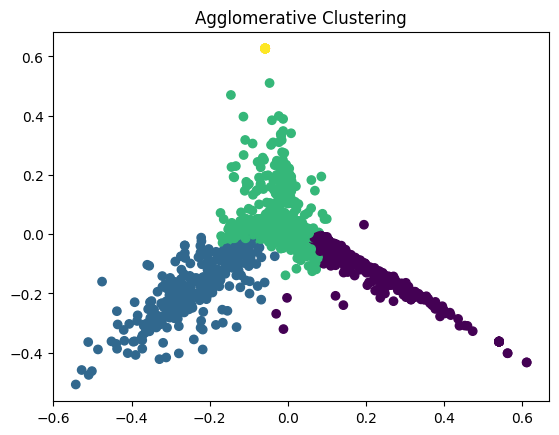

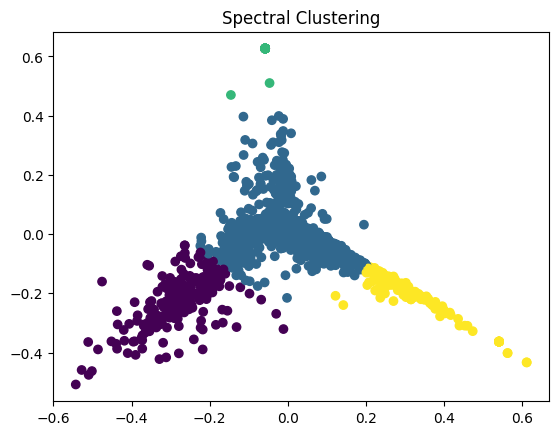

In [154]:
agglomerative(clean1)
spectral(clean1)

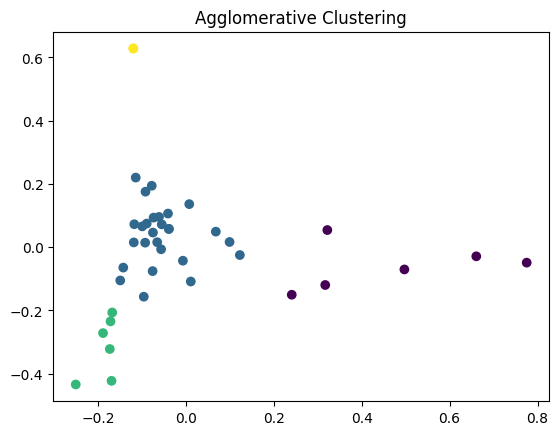

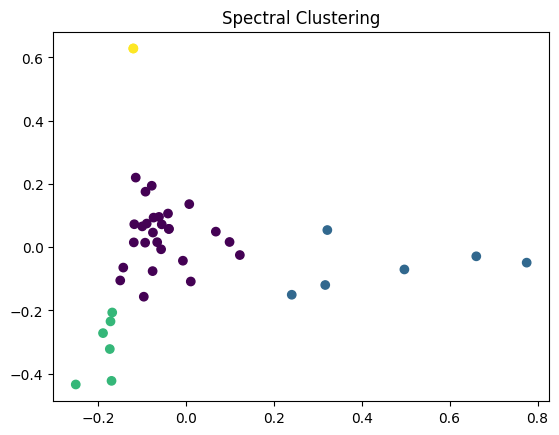

In [155]:
agglomerative(clean2)
spectral(clean2)

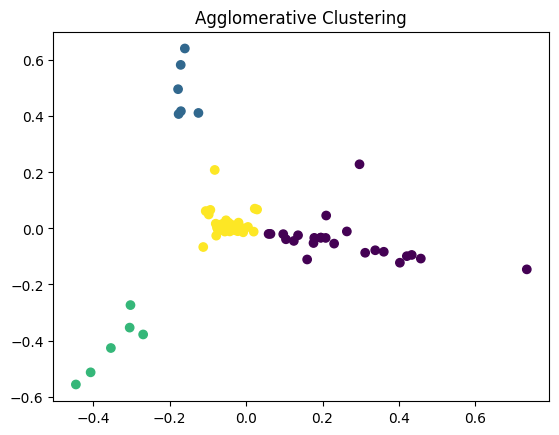

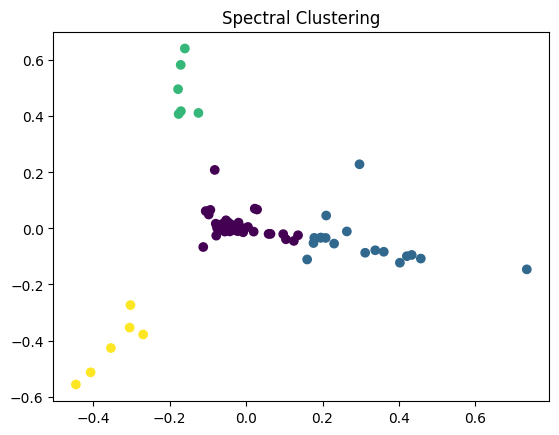

In [156]:
agglomerative(clean3)
spectral(clean3)

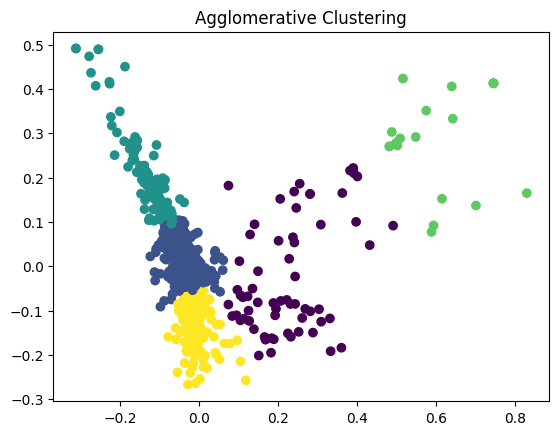

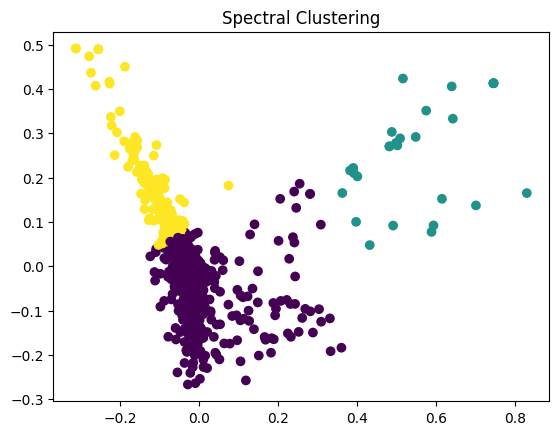

In [157]:
agglomerative(clean4)
spectral(clean4)

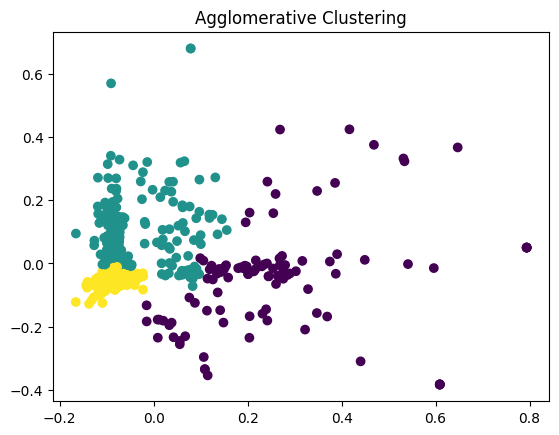

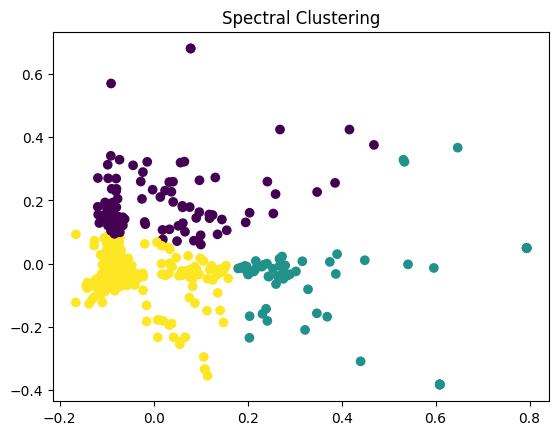

In [158]:
agglomerative(clean5)
spectral(clean5)

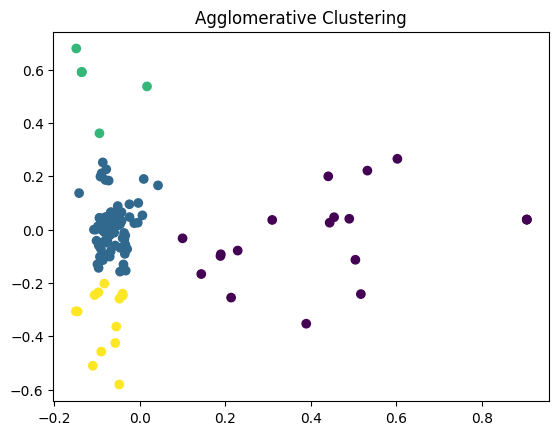

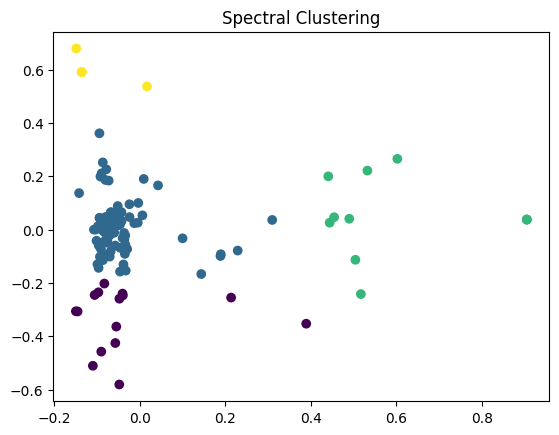

In [159]:
agglomerative(clean6)
spectral(clean6)

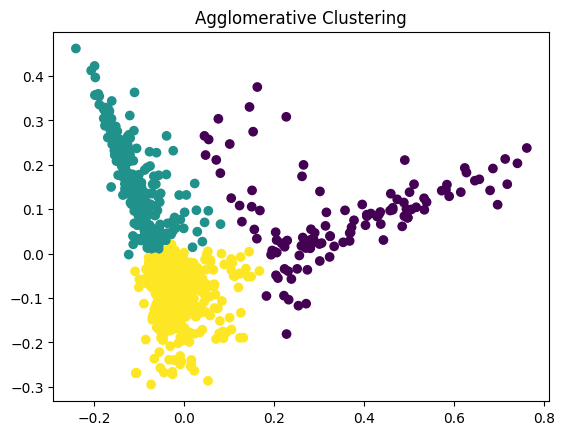

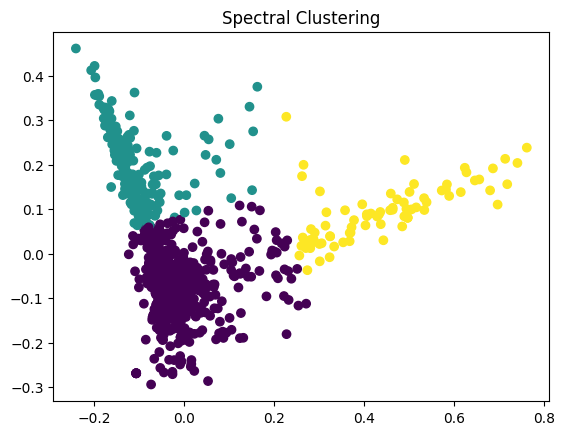

In [160]:
agglomerative(clean7)
spectral(clean7)

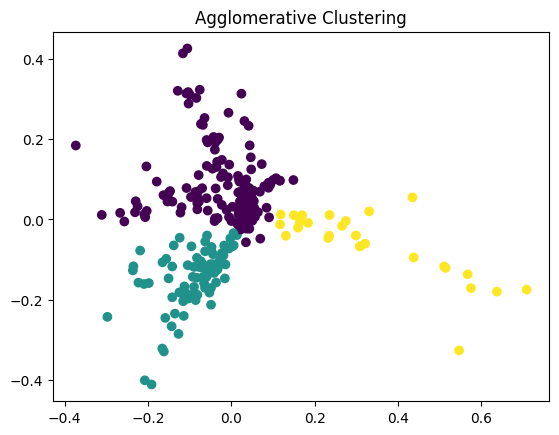

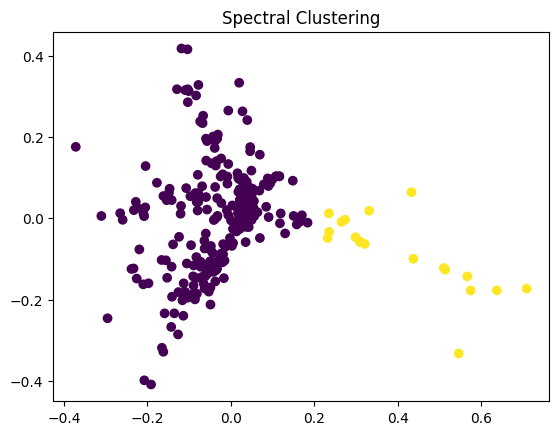

In [161]:
agglomerative(clean8)
spectral(clean8)

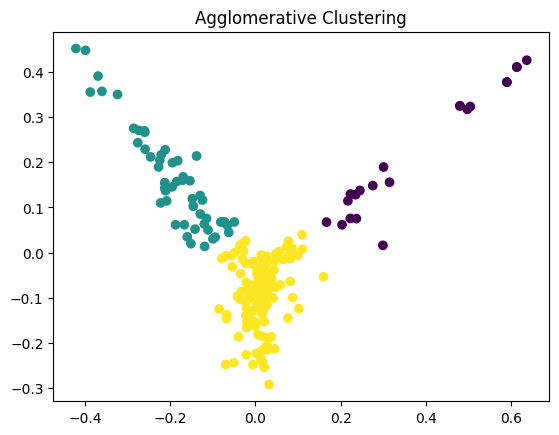

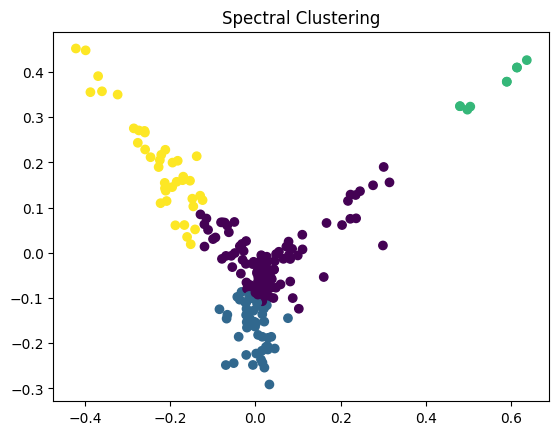

In [162]:
agglomerative(clean9)
spectral(clean9)

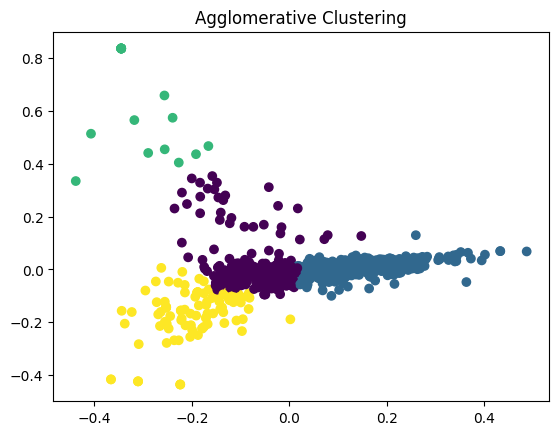

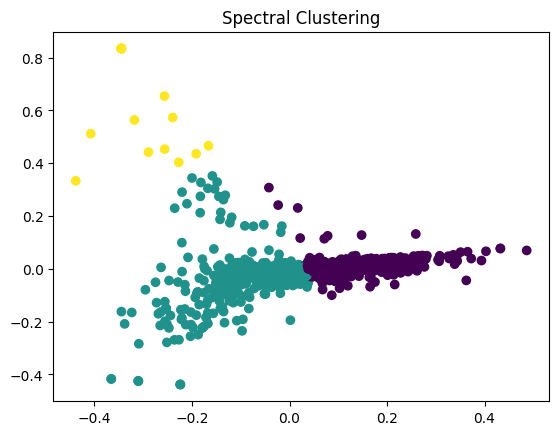

In [163]:
agglomerative(clean10)
spectral(clean10)